<a href="https://colab.research.google.com/github/MatheusAlvesCavalcante/estatisticas-alimentacao-prae-ufc/blob/main/estatisticas_alimentacao_prae_ufc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAREFA 1**

Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Começando

In [ ]:
df_ufcprae = pd.read_csv("ufc-prae-comensais-2024.csv")

In [ ]:
df_ufcprae.head()

,cpf_cnpj,vinculo_comensal,categoria_acesso,tipo_refeicao,quantidade_refeicao
0,***425413**,ISENCAO_PARCIAL,NÃO PAGANTE,Almoço,93
1,***425413**,ISENCAO_PARCIAL,NÃO PAGANTE,Jantar,23
2,***492743**,DISCENTE,PAGANTE,Almoço,82
3,***492743**,DISCENTE,PAGANTE,Jantar,13
4,***603453**,DISCENTE,PAGANTE,Almoço,1


Calculando as medidas


In [ ]:

def moda_segura(x):
    return x.mode().iloc[0] if not x.mode().empty else None


df_novo = (df_ufcprae.groupby("cpf_cnpj", as_index=False).agg(
    soma_refeicao = ("quantidade_refeicao", "sum"),
    media_refeicao = ("quantidade_refeicao", "mean"),
    mediana_refeicao = ("quantidade_refeicao", "median"),
    moda_refeicao = ("quantidade_refeicao", moda_segura),
    minimo_refeicao = ("quantidade_refeicao", "min"),
    maximo_refeicao = ("quantidade_refeicao", "max"),
    ))

total = df_novo["soma_refeicao"].sum()
df_novo["participacao_total"] = (df_novo["soma_refeicao"] / total) * 100

df_novo["media_refeicao"] = df_novo["media_refeicao"].astype(int)
df_novo["mediana_refeicao"] = df_novo["mediana_refeicao"].round(2)



df_novo.head(5)

,cpf_cnpj,soma_refeicao,media_refeicao,mediana_refeicao,moda_refeicao,minimo_refeicao,maximo_refeicao,participacao_total
0,***000000**,219,31,10.0,1,1,101,0.011090
1,***000053**,118,59,59.0,37,37,81,0.005976
2,***000083**,84,42,42.0,9,9,75,0.004254
3,***000103**,193,96,96.5,78,78,115,0.009774
4,***000113**,5,5,5.0,5,5,5,0.000253


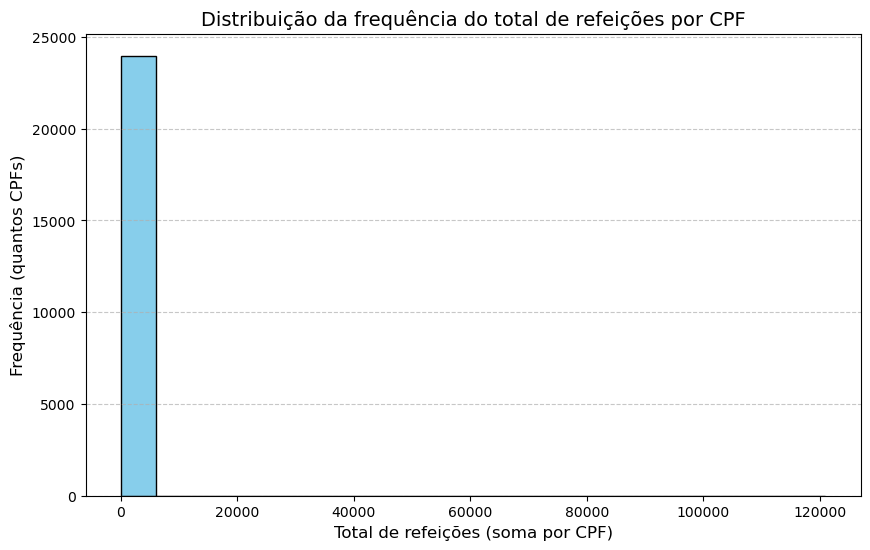

In [ ]:

plt.figure(figsize=(10,6))
plt.hist(df_novo["soma_refeicao"], bins=20, color='skyblue', edgecolor='black')


plt.title("Distribuição da frequência do total de refeições por CPF", fontsize=14)
plt.xlabel("Total de refeições (soma por CPF)", fontsize=12)
plt.ylabel("Frequência (quantos CPFs)", fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Arrumando esse gráfico


In [ ]:
Q1 = df_novo["soma_refeicao"].quantile(0.25)
Q3 = df_novo["soma_refeicao"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite superior: {limite_superior}")


Limite superior: 247.0


In [ ]:
df_sem_outliers = df_novo[
    (df_novo["soma_refeicao"] >= limite_inferior) &
    (df_novo["soma_refeicao"] <= limite_superior)
]

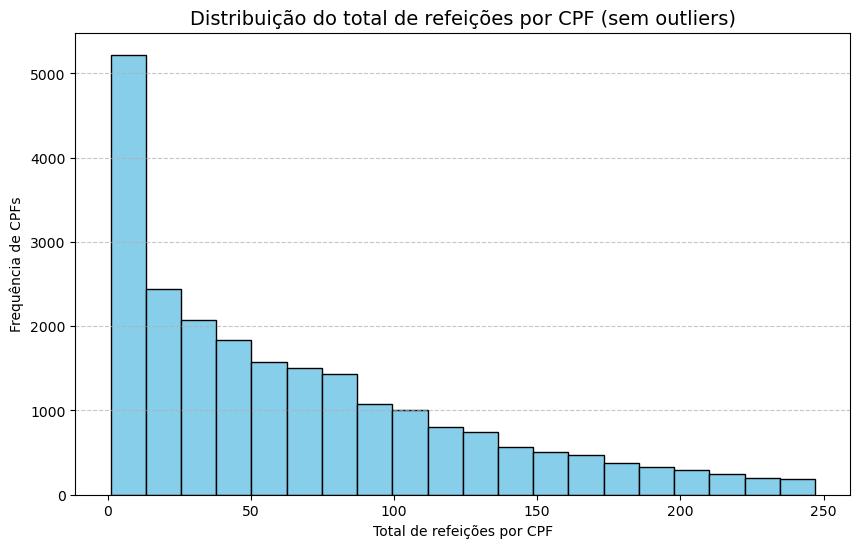

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df_sem_outliers["soma_refeicao"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição do total de refeições por CPF (sem outliers)", fontsize=14)
plt.xlabel("Total de refeições por CPF")
plt.ylabel("Frequência de CPFs")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df_sem_outliers.head(5)

,cpf_cnpj,soma_refeicao,media_refeicao,mediana_refeicao,moda_refeicao,minimo_refeicao,maximo_refeicao,participacao_total
0,***000000**,219,31,10.0,1,1,101,0.011090
1,***000053**,118,59,59.0,37,37,81,0.005976
2,***000083**,84,42,42.0,9,9,75,0.004254
3,***000103**,193,96,96.5,78,78,115,0.009774
4,***000113**,5,5,5.0,5,5,5,0.000253


P(não pagante | almoç​o)

In [ ]:
cpfs_validos = set(df_sem_outliers["cpf_cnpj"])

df_limpo = df_ufcprae[df_ufcprae["cpf_cnpj"].isin(cpfs_validos)]

almoco = df_limpo[df_limpo["tipo_refeicao"].str.lower().str.contains("almo")]

total_refeicoes_almoco = almoco["quantidade_refeicao"].sum()

nao_pagante_almoco = almoco[
    almoco["categoria_acesso"].str.upper().str.contains("NÃO PAGANTE|ISENCAO|ISENÇÃO")
]["quantidade_refeicao"].sum()

prob = nao_pagante_almoco / total_refeicoes_almoco

print(f"Total de refeições no almoço (sem outliers): {total_refeicoes_almoco}")
print(f"Total de refeições de não pagantes (sem outliers): {nao_pagante_almoco}")
print(f"Probabilidade = {prob:.4f} ({prob*100:.2f}%)")

Total de refeições no almoço (sem outliers): 1056511
Total de refeições de não pagantes (sem outliers): 302709
Probabilidade = 0.2865 (28.65%)


P(jantou ∣ almoçou)

In [ ]:
docentes = df_limpo[df_limpo["vinculo_comensal"].str.upper().str.contains("DOCENTE")]
docentes_almoco = set(docentes[docentes["tipo_refeicao"].str.lower().str.contains("almo")]["cpf_cnpj"])
docentes_jantar = set(docentes[docentes["tipo_refeicao"].str.lower().str.contains("jant")]["cpf_cnpj"])

docentes_almoco_e_jantar = docentes_almoco.intersection(docentes_jantar)


prob = len(docentes_almoco_e_jantar) / len(docentes_almoco)
print(f"Docentes (sem outliers) que almoçaram: {len(docentes_almoco)}")
print(f"Docentes (sem outliers) que almoçaram e jantaram: {len(docentes_almoco_e_jantar)}")
print(f"Probabilidade P(jantar | almoço) = {prob:.4f} ({prob*100:.2f}%)")

Docentes (sem outliers) que almoçaram: 153
Docentes (sem outliers) que almoçaram e jantaram: 29
Probabilidade P(jantar | almoço) = 0.1895 (18.95%)
